```matlab
function [h,y] = lms(x,d,delta,N)
% LMS Algorithm for Coefficient Adjustment
% ----------------------------------------
% [h,y] = lms(x,d,delta,N)
%     h = estimated FIR filter
%     y = output array y(n)
%     x = input array x(n)
%     d = desired array d(n), length must be same as x
% delta = step size
%     N = length of the FIR filter
%
M = length(x); y = zeros(1,M);
h = zeros(1,N);
for n = N:M
    x1 = x(n:-1:n-N+1);
     y = h * x1’;
     e = d(n) - y;
     h = h + delta*e*x1;
end
```

In [1]:
using FFTW
using Plots
using LinearAlgebra

In [2]:
include("_support/operations.jl")

norm (generic function with 15 methods)

In [3]:
include("lms.jl")

lms (generic function with 1 method)

In [4]:
# Helper function to generate a noisy sinusoidal signal
function generate_signals(frequency, Fs, duration, noise_level)
    t = 0:1/Fs:duration
    clean_signal = sin.(2π * frequency * t)
    noise = noise_level * randn(length(t))
    noisy_signal = clean_signal + noise
    return t, clean_signal, noisy_signal
end


generate_signals (generic function with 1 method)

In [5]:
# Define parameters
frequency = 1.0   # frequency of the sinusoid
Fs = 100          # sampling frequency
duration = 2.0    # duration of the signal in seconds
noise_level = 0.5 # noise amplitude

# Generate signals
t, clean_signal, noisy_signal = generate_signals(frequency, Fs, duration, noise_level)

# LMS algorithm parameters
Δ = 0.01  # step size (learning rate)
N = 20    # length of the FIR filter (number of coefficients)

# Apply the LMS algorithm
h, y = lms(noisy_signal, clean_signal, Δ, N);

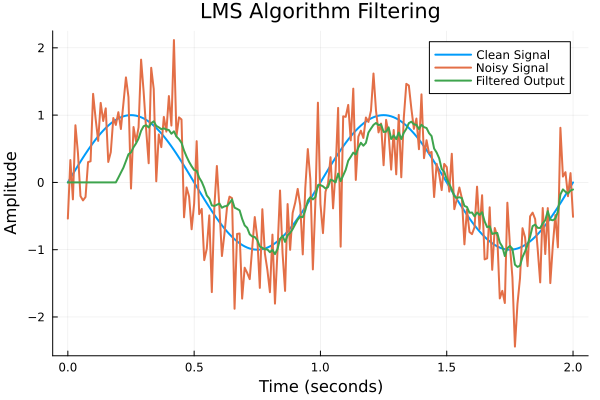

In [6]:
# Plot the results
plot(t, [clean_signal, noisy_signal, y],
     label=["Clean Signal" "Noisy Signal" "Filtered Output"],
     title="LMS Algorithm Filtering",
     xlabel="Time (seconds)",
     ylabel="Amplitude",
     linewidth=2)

# References
- [ ] [Digital Signal Processing Using MATLAB](https://www.amazon.com/Digital-Signal-Processing-Using-Matlab/dp/0534938051)